# Growth and Challenges
### A Deep Dive into South Asian Development

# EDA 

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#### Connect to file

In [38]:

data=pd.read_csv('archive/South_Asian_dataset.csv')
data.head()

,Country,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",Unnamed: 10,Unnamed: 11
0,Afghanistan,2000,3521418060,0,1.801.883.694,7.955,19542982,1.443.803.024,55.298,92.0,NaN,NaN
1,Bhutan,2000,460733418.4,3.355.068.305,7.846.184.027,1.652,587207,2.800.570.184,62.010,58.4,NaN,NaN
2,Bangladesh,2000,53369787319,5.293.294.719,4.131.001.853,3.270,129193327,1.905.524.049,65.779,63.0,NaN,NaN
3,India,2000,"4,68E+16",3.840.991.157,4.420.353.304,7.856,1059633675,1.822.184.002,62.669,66.4,NaN,NaN
4,Maldives,2000,624337145.3,3.845.810.232,2.209.988.231,1.970,282507,1.568.301.447,70.876,31.8,NaN,NaN


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 12 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Country                                                              192 non-null    object 
 1   Year                                                                 192 non-null    int64  
 2   GDP (current US$)                                                    192 non-null    object 
 3   GDP growth (annual %)                                                192 non-null    object 
 4   GDP per capita (current US$)                                         192 non-null    object 
 5   Unemployment, total (% of total labor force) (modeled ILO estimate)  192 non-null    float64
 6   Population, total                                                    192 non-null    int64  
 7   Populati

In [40]:
data = data.drop(columns=['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'])


KeyError: "['Unnamed: 12'] not found in axis"

In [4]:
data['GDP (current US$)'] = data['GDP (current US$)'].str.replace(',', '.').astype(float)

In [ ]:
print(data['GDP (current US$)'].head()) 
print(data['GDP (current US$)'].dtype)

In [6]:
# Strip whitespace and convert to title case
data['Country'] = data['Country'].str.strip().str.title()


In [ ]:
print(data['Country'].nunique())  # Check the number of unique countries
print(data['Country'].unique())  # Inspect unique country names


In [ ]:
# Convert to integer if not already
data['Year'] = data['Year'].astype(int)

# Check range of years
print(data['Year'].min(), data['Year'].max())

# Sort by year if necessary
data = data.sort_values(by='Year')


In [ ]:
import numpy as np
q1 = data['GDP (current US$)'].quantile(0.25)
q3 = data['GDP (current US$)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter for outliers
outliers = data[(data['GDP (current US$)'] < lower_bound) | (data['GDP (current US$)'] > upper_bound)]
print(outliers)


In [ ]:
# Fill missing values with the mean or median:
# python
# Copy code

data['GDP growth (annual %)'] = data['GDP growth (annual %)'].fillna(data['GDP growth (annual %)'].mean())


In [ ]:
print(data.isnull().sum())


In [ ]:
data.info()

In [ ]:
data.head()

## demography of each country


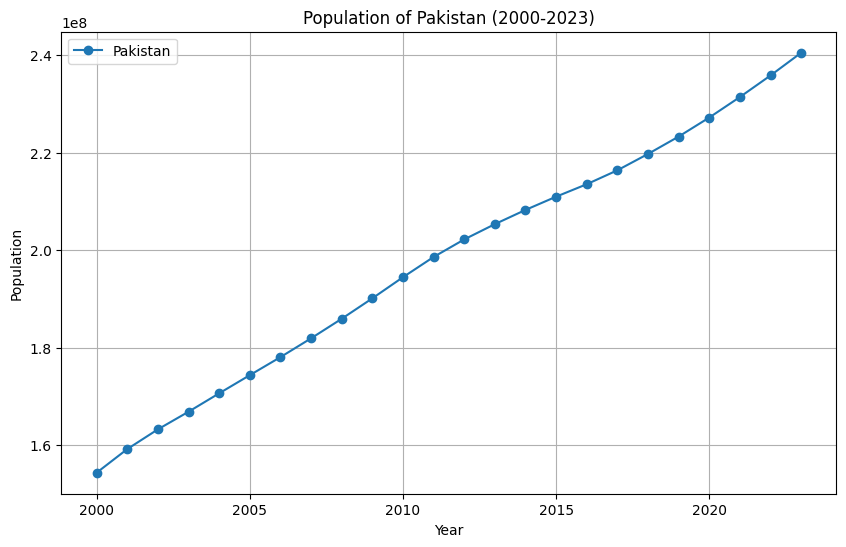

In [42]:
import matplotlib.pyplot as plt

# Filter the dataset for Pakistan
pakistan_data = data[(data['Country'] == 'Pakistan') & (data['Year'].between(2000, 2023))]

# Plot the population for Pakistan
plt.figure(figsize=(10, 6))
plt.plot(pakistan_data['Year'], pakistan_data['Population, total'], marker='o', label='Pakistan')

# Add labels and title
plt.title("Population of Pakistan (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid()
plt.legend()
plt.show()


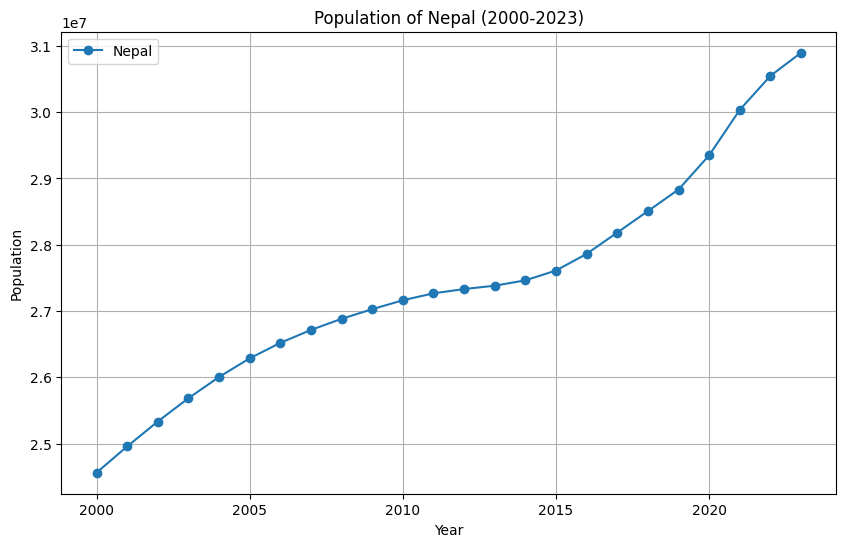

In [43]:
# Filter the dataset for Nepal
nepal_data = data[(data['Country'] == 'Nepal') & (data['Year'].between(2000, 2023))]

# Plot the population for Nepal
plt.figure(figsize=(10, 6))
plt.plot(nepal_data['Year'], nepal_data['Population, total'], marker='o', label='Nepal')

# Add labels and title
plt.title("Population of Nepal (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid()
plt.legend()
plt.show()


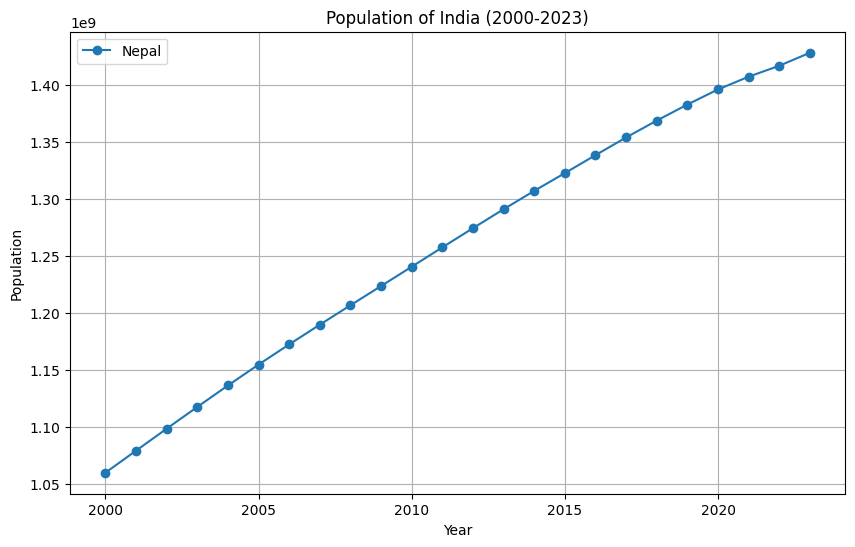

In [44]:

nepal_data = data[(data['Country'] == 'India') & (data['Year'].between(2000, 2023))]

# Plot the population for india
plt.figure(figsize=(10, 6))
plt.plot(nepal_data['Year'], nepal_data['Population, total'], marker='o', label='india')

# Add labels and title
plt.title("Population of India (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid()
plt.legend()
plt.show()


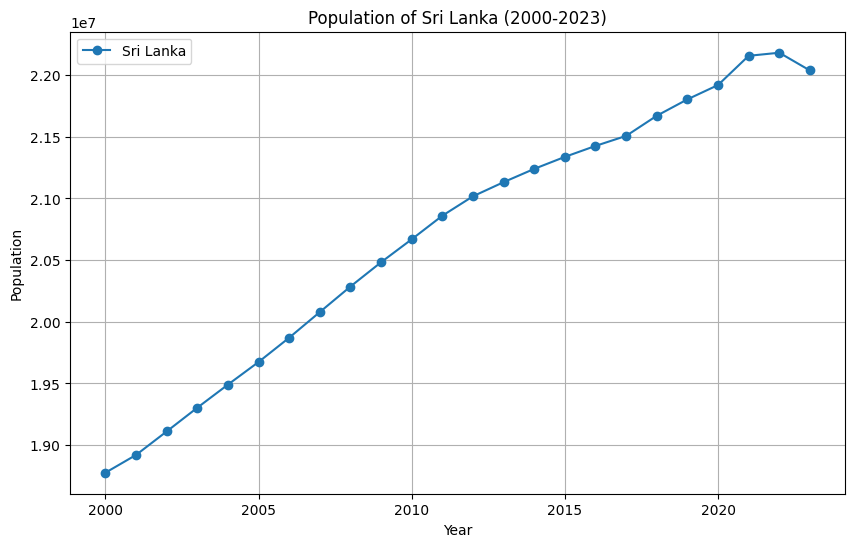

In [45]:

nepal_data = data[(data['Country'] == 'Sri Lanka') & (data['Year'].between(2000, 2023))]

# Plot the population for Sri Lanka
plt.figure(figsize=(10, 6))
plt.plot(nepal_data['Year'], nepal_data['Population, total'], marker='o', label='Sri Lanka')

# Add labels and title
plt.title("Population of Sri Lanka (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid()
plt.legend()
plt.show()


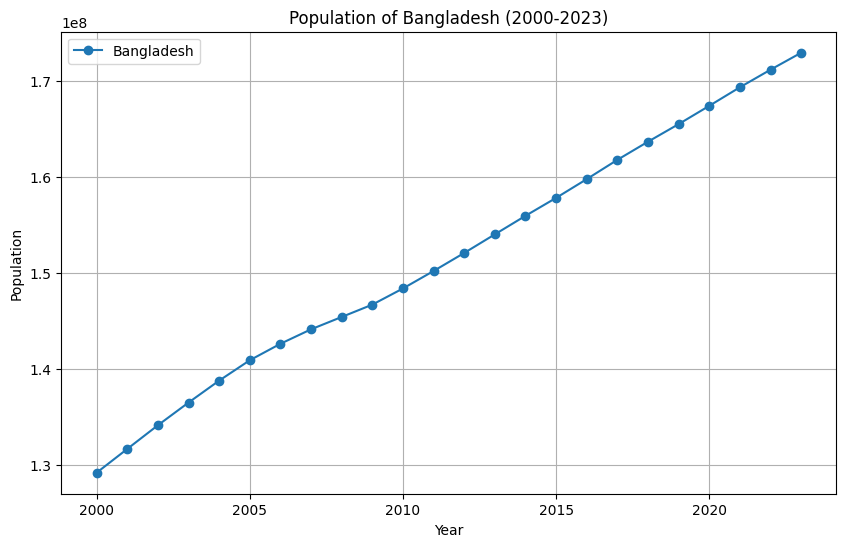

In [46]:

nepal_data = data[(data['Country'] == 'Bangladesh') & (data['Year'].between(2000, 2023))]

plt.figure(figsize=(10, 6))
plt.plot(nepal_data['Year'], nepal_data['Population, total'], marker='o', label='Bangladesh')

# Add labels and title
plt.title("Population of Bangladesh (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid()
plt.legend()
plt.show()


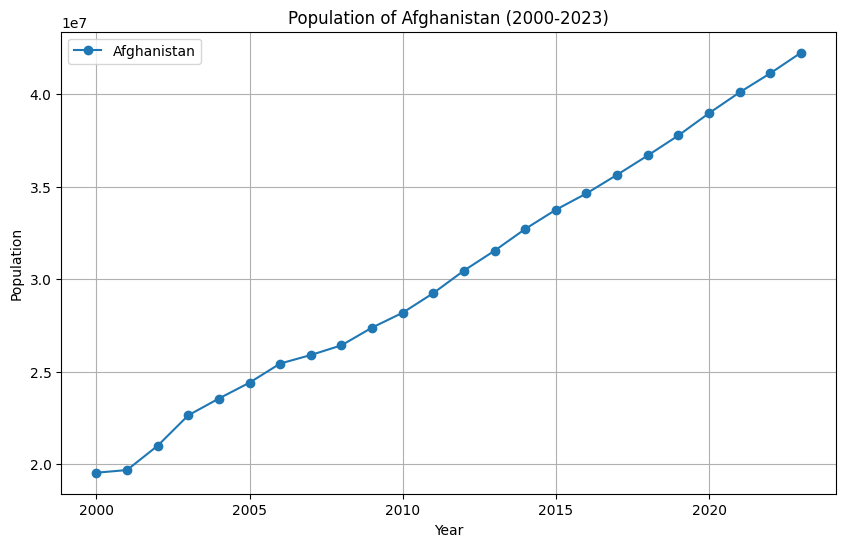

In [47]:
nepal_data = data[(data['Country'] == 'Afghanistan') & (data['Year'].between(2000, 2023))]

plt.figure(figsize=(10, 6))
plt.plot(nepal_data['Year'], nepal_data['Population, total'], marker='o', label='Afghanistan')

plt.title("Population of Afghanistan (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid()
plt.legend()
plt.show()


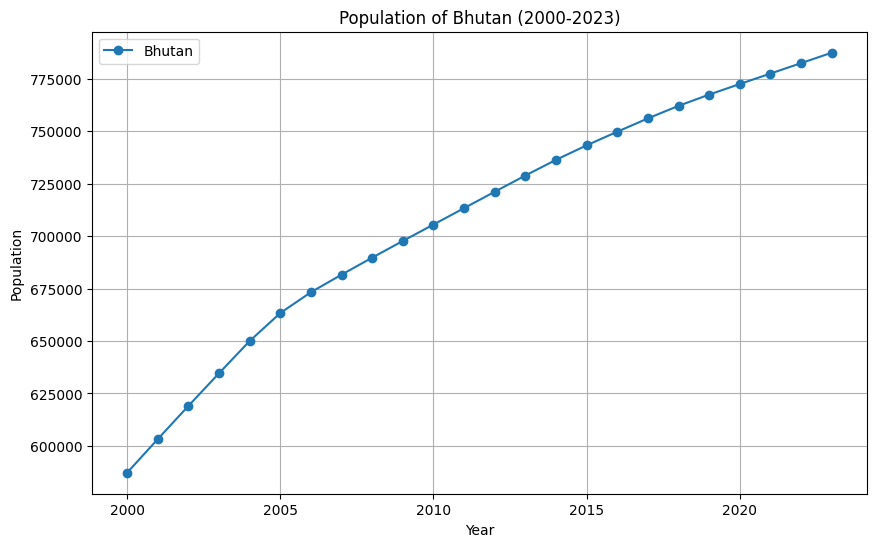

In [48]:
nepal_data = data[(data['Country'] == 'Bhutan') & (data['Year'].between(2000, 2023))]

plt.figure(figsize=(10, 6))
plt.plot(nepal_data['Year'], nepal_data['Population, total'], marker='o', label='Bhutan')

plt.title("Population of Bhutan (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid()
plt.legend()
plt.show()


In [ ]:
unemployement

C:\Users\PC\AppData\Local\Temp\ipykernel_1568\4010169338.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_unemployment = filtered_data.groupby(['Country', 'Interval'])[unemployment_column].mean().reset_index()


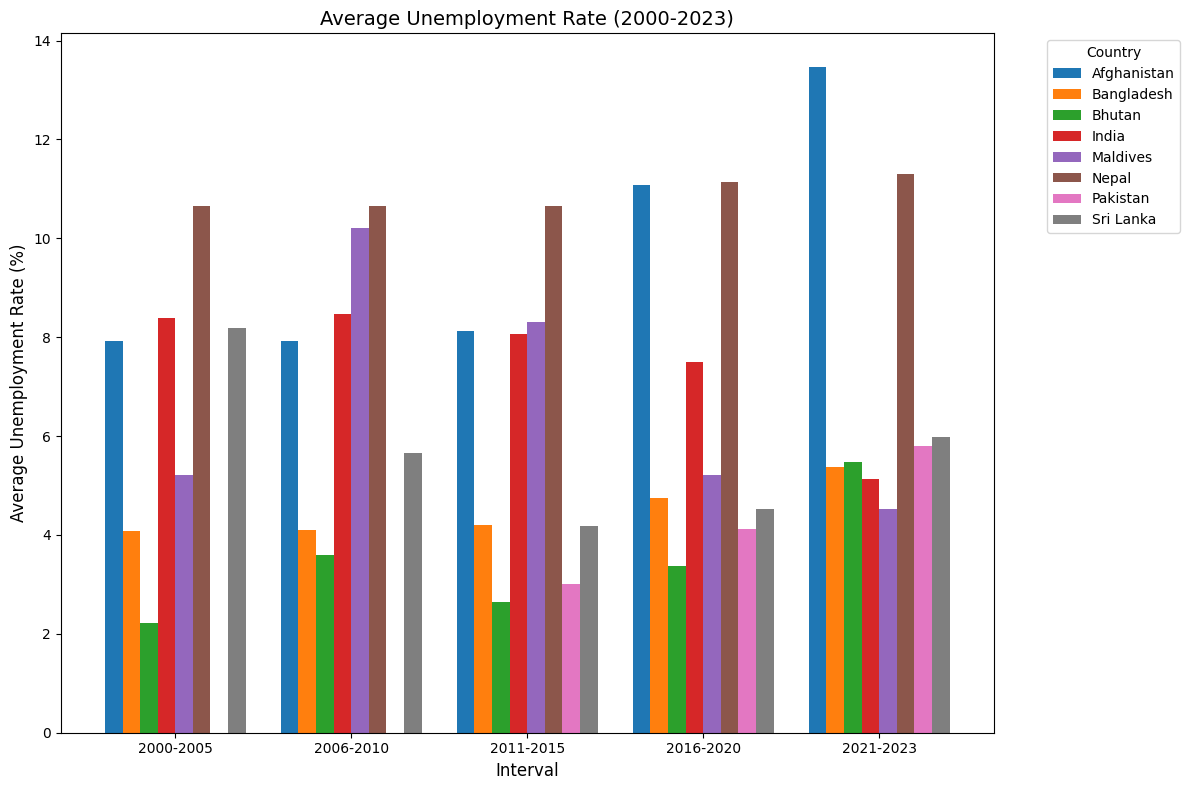

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Correct column name for unemployment
unemployment_column = 'Unemployment, total (% of total labor force) (modeled ILO estimate)'

# Create 5-year intervals
filtered_data['Interval'] = pd.cut(
    filtered_data['Year'],
    bins=[2000, 2005, 2010, 2015, 2020, 2023],  # Adjust bins as needed
    labels=['2000-2005', '2006-2010', '2011-2015', '2016-2020', '2021-2023'],
    right=True
)

# Threshold for outlier exclusion (e.g., max reasonable unemployment rate)
outlier_threshold = 20

# Replace outliers in Pakistan's unemployment data with NaN
filtered_data.loc[
    (filtered_data['Country'] == 'Pakistan') & 
    (filtered_data[unemployment_column] > outlier_threshold), 
    unemployment_column
] = None

# Recalculate average unemployment rates for each 5-year interval
avg_unemployment = filtered_data.groupby(['Country', 'Interval'])[unemployment_column].mean().reset_index()

# Pivot data for visualization
pivot_data = avg_unemployment.pivot(index='Interval', columns='Country', values=unemployment_column)

# Plot the data
pivot_data.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title('Average Unemployment Rate (2000-2023)', fontsize=14)
plt.xlabel('Interval', fontsize=12)
plt.ylabel('Average Unemployment Rate (%)', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
filtered_data = data[data['Year'].between(2000, 2023)][['Country', 'Year', 'Unemployment, total (% of total labor force) (modeled ILO estimate)','Mortality rate, infant (per 1,000 live births)']]


## mortality rate

C:\Users\PC\AppData\Local\Temp\ipykernel_1568\2792441593.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_mortality = filtered_data.groupby(['Country', 'Interval'])[mortality_column].mean().reset_index()


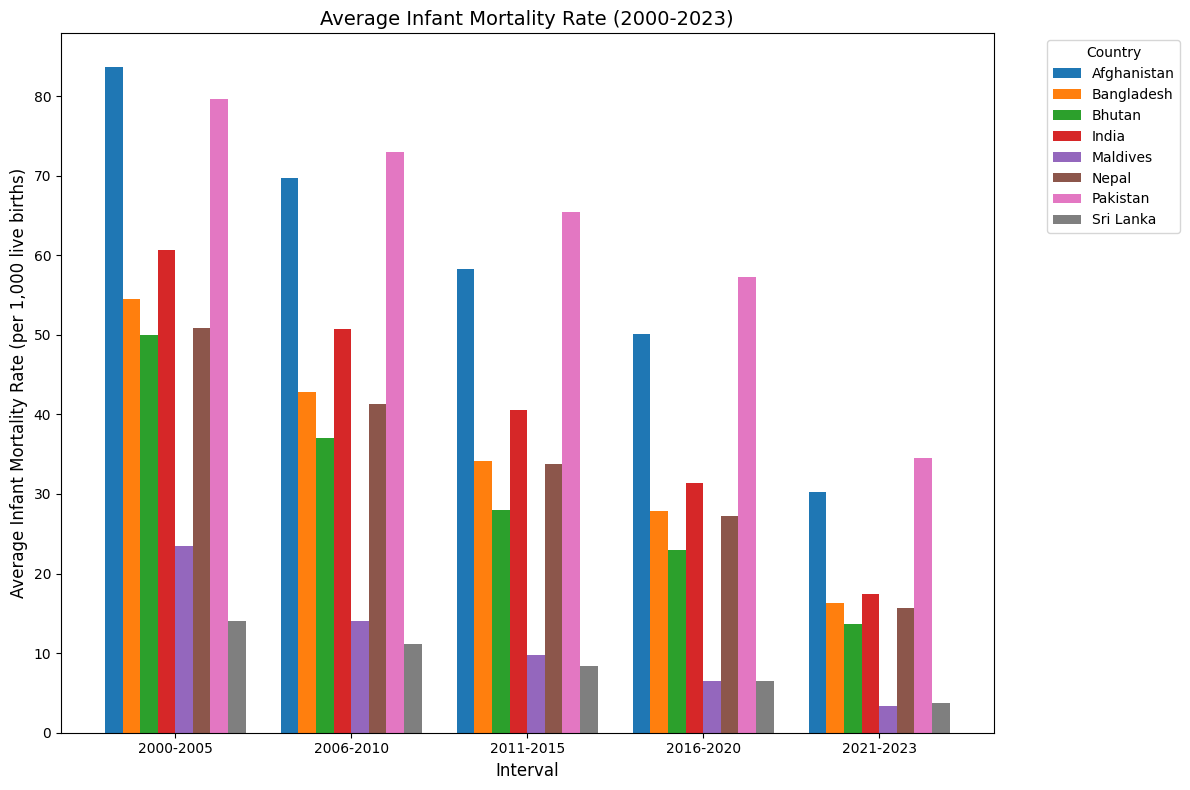

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Correct column name for mortality rate
mortality_column = 'Mortality rate, infant (per 1,000 live births)'

# Create 5-year intervals
filtered_data['Interval'] = pd.cut(
    filtered_data['Year'],
    bins=[2000, 2005, 2010, 2015, 2020, 2023],  # Adjust bins as needed
    labels=['2000-2005', '2006-2010', '2011-2015', '2016-2020', '2021-2023'],
    right=True
)

# Threshold for outlier exclusion (e.g., max reasonable mortality rate)
outlier_threshold = 100  # Adjust threshold as appropriate for mortality rates

# Replace outliers in Pakistan's mortality rate data with NaN
filtered_data.loc[
    (filtered_data['Country'] == 'Pakistan') & 
    (filtered_data[mortality_column] > outlier_threshold), 
    mortality_column
] = None

# Recalculate average mortality rates for each 5-year interval
avg_mortality = filtered_data.groupby(['Country', 'Interval'])[mortality_column].mean().reset_index()

# Pivot data for visualization
pivot_data = avg_mortality.pivot(index='Interval', columns='Country', values=mortality_column)

# Plot the data
pivot_data.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title('Average Infant Mortality Rate (2000-2023)', fontsize=14)
plt.xlabel('Interval', fontsize=12)
plt.ylabel('Average Infant Mortality Rate (per 1,000 live births)', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [41]:
print(data.columns)


Index(['Country', 'Year', 'GDP (current US$)', 'GDP growth (annual %)',
       'GDP per capita (current US$)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Population, total', 'Population growth (annual %)',
       'Life expectancy at birth, total (years)',
       'Mortality rate, infant (per 1,000 live births)', 'Unnamed: 10',
       'Unnamed: 11'],
      dtype='object')


In [60]:
print(filtered_data.columns)


Index(['Country', 'Year',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Interval'],
      dtype='object')


In [61]:
filtered_data = data[data['Year'].between(2000, 2023)][['Country', 'Year', 'Unemployment, total (% of total labor force) (modeled ILO estimate)','Mortality rate, infant (per 1,000 live births)']]
